In [534]:
# Clear notebook variables to start. 
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [535]:
# Import dependencies and set matplotlib to display inline 

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from random import randint
from math import sqrt
from IPython import display
%matplotlib inline 

In [536]:
# Load data into a pandas dataframe
df = pd.read_csv('../Data/mall_customers.csv')

In [537]:
# A True value shuffles data rows
shuffle_on = False
if shuffle_on:
    df = df.sample(frac=1)

In [538]:
# Print data dimensionality. Then display first few rows
print('Numpy shape:', df.shape)
print('Number of data examples:', df.shape[0])
print('Number of data featrues:', df.shape[1])
print('Number of dimensions:', df.ndim)
df.head()

Numpy shape: (200, 5)
Number of data examples: 200
Number of data featrues: 5
Number of dimensions: 2


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [539]:
# Display summary statistics of the data
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [540]:
# Define dataset from existing dataframe
x = df['Age'].to_numpy()
y = df['Annual Income (k$)'].to_numpy()

In [541]:
# Set maximum number of iterations and number of clusters 
max_iter = 10
k = 4

In [542]:
# Define max and min of x and y datasets. Will be used to randomize centroids' initial positions
x_max = np.amax(x) 
x_min = np.amin(x)
y_max = np.amax(y)
y_min = np.amin(y)

In [543]:
# Initialize centroids at random locations within reasonable range.
# This includes a margin so that centroids are not placed at edge of the range

margin = .20
k_x = [] # List of x coordinates of all centroids
k_y = [] # List of y coordinates of all centroids

for i in range(k):
    k_x.append(randint(x_min, x_max)*(1-margin))
    k_y.append(randint(y_min, y_max)*(1-margin))

print('Centroid coordinates:')
for j in range(k):
    print(k_x[j],', ',k_y[j], sep='')

Centroid coordinates:
26.400000000000002, 49.6
19.200000000000003, 87.2
26.400000000000002, 86.4
30.400000000000002, 56.0


In [544]:
# Make an empty numpy array of size k x len(x) to store distances to centroids
# Build in extra row for the minimum distance value
d = np.zeros([k + 1, len(x)])
d.shape

(5, 200)

In [545]:
def find_distance(x, y, k_x, k_y):
    '''Finds distances from each point to each center.
    x,y are data, k_x, k_y are center coordinates'''
    distance = sqrt((x - k_x)**2 + (y - k_y)**2)
    return distance

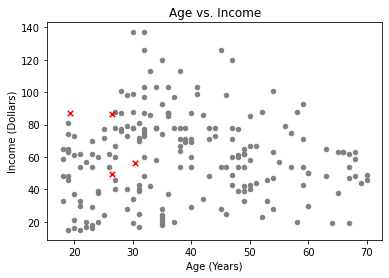

In [546]:
# Visualize data (grey) and starting centroid locations (red)
figure(facecolor='w')
plt.scatter(x, y, s=20, color='grey')
plt.scatter(k_x, k_y, s = 30, color='red', marker='x')
plt.title('Age vs. Income')
plt.xlabel('Age (Years)')
plt.ylabel('Income (Dollars)')
plt.show()

In [547]:
print(len(x))

200


In [548]:
# Iteratively find the distance between every point and every center. 
# Construct array d containing distances from every point to every centroid
# Rows (except last) = distances from data points to each centroid k_n
# Last Row of d = min(column), ie distances of data points to closes centroid
# Col of d = distance from datapoint m to each centroid k_n, min is last row

def make_clusters(x, y, k, d):
    clusters = {}
    for j in range(len(x)): #200
        min_distance = 9999999999 # Arbitrarily large number 
        x_i, y_i = x[j], y[j] # Select (x, y) coords of one data point at a time
        for i in range(0, k): # k = number of clusters
            k_xi, k_yi = k_x[i], k_y[i] # Coordinates of the centroids 
            distance = find_distance(x_i, y_i, k_xi, k_yi)
            if distance < min_distance:
                min_distance = distance 
                centroid_coords = k_xi, k_yi
            d[i,j] = distance

        try: 
            clusters[centroid_coords].append(tuple([x_i, y_i]))
        except KeyError:
            clusters[centroid_coords] = [tuple([x_i, y_i])]

        # Uncomment below to see a printout of data points and their nearest centroids. 
        # print("Datapoint:",j,", x:",x_i,", y:",y_i,", Minimum distance:",min_distance, ", Nearest_centroid:", centroid_coords)

        col = d[:k,j]
        alt_min_distance = np.amin(col)
        d[k,j] = alt_min_distance
        
    return clusters

clusters = make_clusters(x, y, k, d)

In [549]:
# print("Number of entries in clusters dict:", len(clusters), "; Keys:",clusters.keys())
# print("Centroid coords:")
# for i in range(k):
#     print(k_x[i], k_y[i])

In [550]:
def mean(lst):
    pass
    # return sum(lst)/len(lst)

In [551]:
def make_centers(k, clusters):
    centers = []
    for i in range(k):
        m_x = 0
        m_y = 0
        items = 0
        for coord in clusters[k_x[i], k_y[i]]:
            items +=1 
            m_x += coord[0]
            m_y += coord[1]
        m_x = m_x/items
        m_y = m_y/items
        centers.append((m_x,m_y))
    return centers

#centers = make_centers(k, clusters)
#print(centers)

In [552]:
def plot_data(clusters):
    # Visualize data 
    colors = ['turquoise', 'blueviolet', 'gold', 'pink']
    figure(facecolor='w')

    i = 0
    for i in range(k):
        for coord in clusters[k_x[i], k_y[i]]:
            plt.scatter(coord[0], coord[1], color=colors[i], edgecolor='grey')
            plt.scatter(centers[i][0], centers[i][1], s= 30, color = 'red', marker='x')

    plt.title('Age vs. Income')
    plt.show()

10


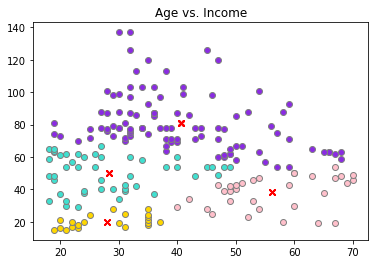

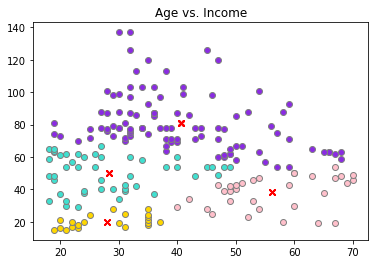

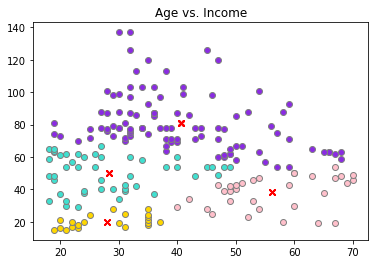

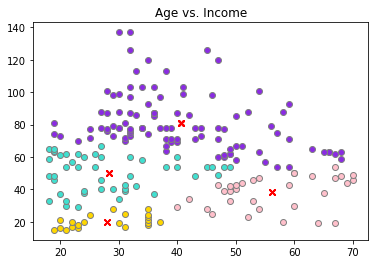

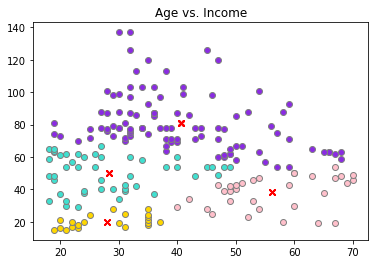

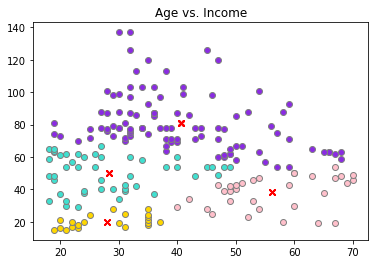

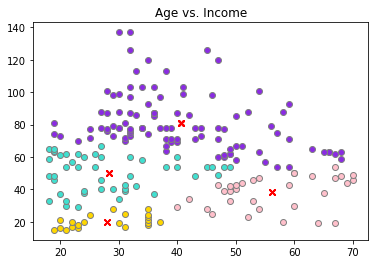

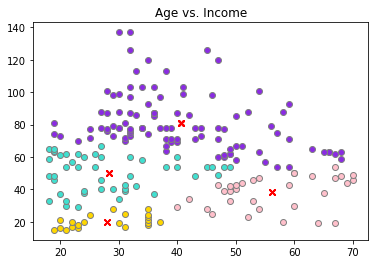

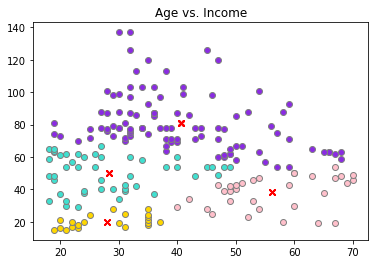

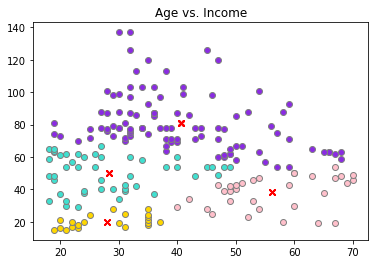

In [533]:
import time
print(max_iter)
for i in range(max_iter):
    clusters = make_clusters(x, y, k, d)
    centers = make_centers(k, clusters)
    plot_data(clusters)

In [526]:
print(k_x)
print(clusters)

[27.200000000000003, 45.6, 35.2, 52.800000000000004]
{(35.2, 12.0): [(19, 15), (21, 15), (20, 16), (23, 16), (31, 17), (22, 17), (35, 18), (23, 18), (30, 19), (35, 19), (24, 20), (37, 20), (22, 20), (35, 21), (20, 21), (35, 23), (35, 24), (25, 24), (31, 25), (29, 28), (35, 28)], (52.800000000000004, 24.8): [(64, 19), (67, 19), (58, 20), (52, 23), (46, 25), (54, 28), (45, 28), (40, 29), (60, 30), (53, 33), (49, 33), (42, 34), (65, 38), (48, 39), (49, 39), (50, 40), (49, 42), (59, 43), (50, 43), (47, 43), (51, 44), (69, 44), (53, 46), (70, 46), (67, 47), (54, 47), (63, 48), (68, 48), (70, 49), (60, 50), (60, 50), (67, 54)], (27.200000000000003, 45.6): [(23, 29), (21, 30), (18, 33), (21, 33), (30, 34), (36, 37), (20, 37), (24, 38), (31, 39), (24, 39), (27, 40), (29, 40), (31, 40), (33, 42), (31, 43), (27, 46), (19, 46), (18, 48), (43, 48), (19, 48), (32, 48), (47, 49), (26, 54), (45, 54), (40, 54), (23, 54), (49, 54), (38, 54), (46, 54), (21, 54), (48, 54), (22, 57), (34, 58), (18, 59), (